In [1]:
from piblin.data import ExperimentSet
from hermes_rheo.file_readers.trios_rheo_txt import TriosRheoReader
from hermes_rheo.transforms.rheo_analysis import RheoAnalysis 
from hermes_rheo.transforms.automated_mastercurve import AutomatedMasterCurve
import matplotlib.pyplot as plt
import os
import warnings
import os
warnings.filterwarnings("ignore") # To avoid displaying annoying warnings from sklearn

In [2]:
# Get the current directory where the notebook is located
current_dir = os.path.dirname(os.path.abspath("__file__"))  # Use "__file__" to get the notebook's directory

# Construct the relative path
filepath = os.path.join(current_dir, 'tutorial_data', 'tutorial_5', 'owchirp_tcs.txt')

In [3]:
experiment = ExperimentSet(TriosRheoReader().data_from_filepath(filepath=filepath, create_composite_datasets=True).measurements)


#### The pipeline is the same as for time-temperature superposition, but in this case, we use time as the state variable. Instead of averaging the step time, we use the first point in the step time measurements

In [4]:
pipeline_copmplex_modulus = RheoAnalysis() + AutomatedMasterCurve(state='time',state_mode = 'first point', x='angular frequency', y='complex modulus', vertical_shift=False, reverse_data=True) 
mastercurve_complex_modulus = pipeline_copmplex_modulus(experiment)

In [5]:
mastercurve_complex_modulus.change_ref(mastercurve_complex_modulus.states[-1])

In [6]:
a_complex = mastercurve_complex_modulus.hparams[0]
a_complex_uncertainties = mastercurve_complex_modulus.huncertainties[0]

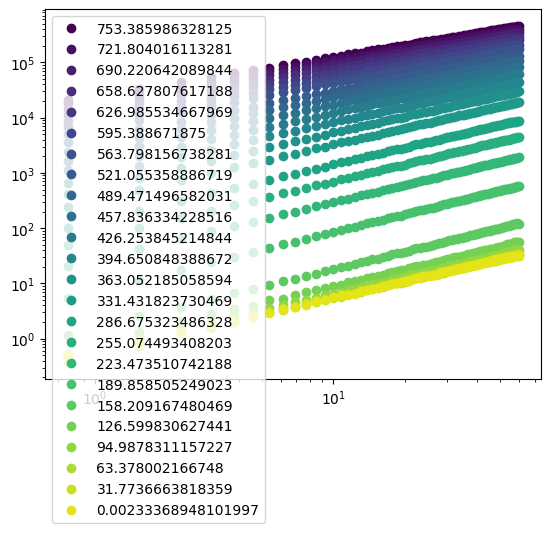

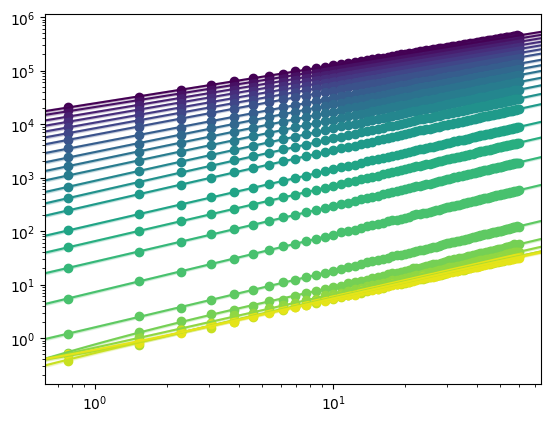

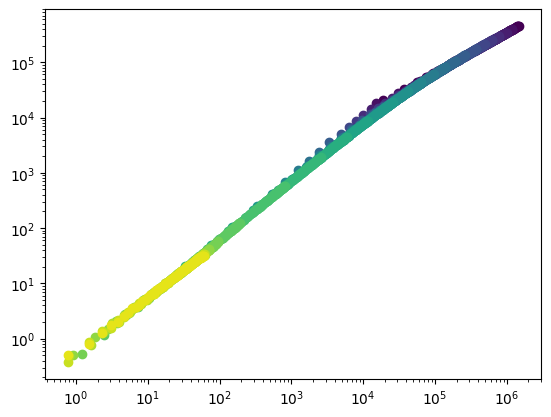

In [7]:
fig1, ax1, fig2, ax2, fig3, ax3 =  mastercurve_complex_modulus.plot(colormap=plt.cm.viridis,)

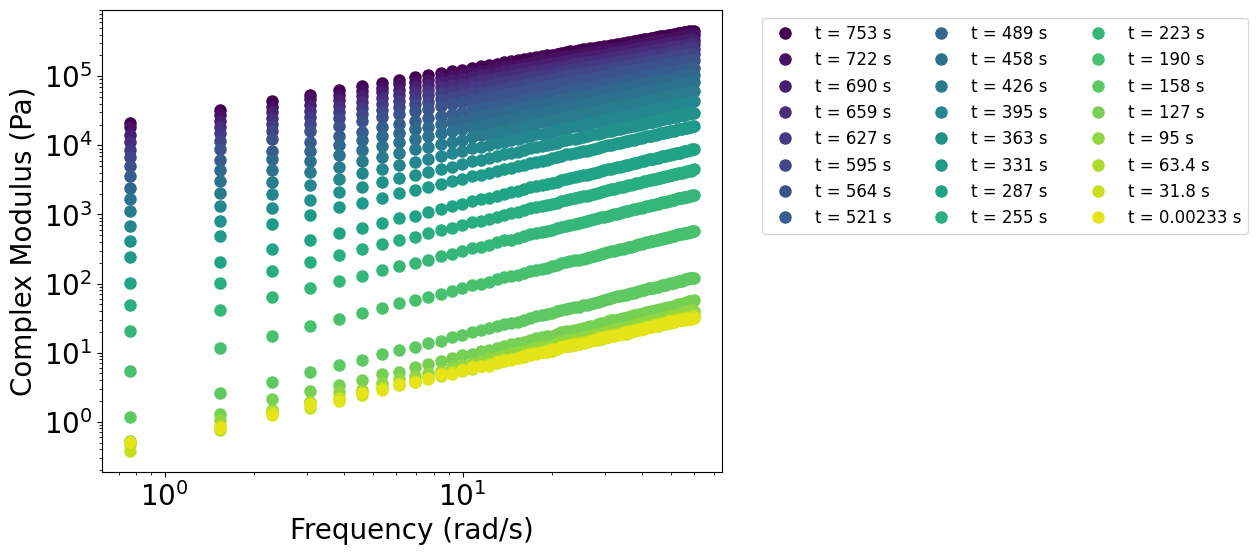

In [8]:
# Set figure size
fig1.set_size_inches(8, 6)

# Set x and y labels
ax1.set_xlabel("Frequency (rad/s)", fontsize = 20)
ax1.set_ylabel("Complex Modulus (Pa)", fontsize = 20)

# Increase markersize for each line in ax1
for line in ax1.get_lines():
    line.set_markersize(8) 

# Set font size for x and y tick labels on ax1
ax1.tick_params(axis='x', labelsize=20)  # For x-axis ticks
ax1.tick_params(axis='y', labelsize=20)  # For y-axis ticks

# Format the legend
handles, labels = ax1.get_legend_handles_labels()
formatted_labels = ['t = {:.3g} s'.format(float(label)) for label in labels]
ax1.legend(handles, formatted_labels, fontsize=12, ncol=3, bbox_to_anchor=(1.05, 1), loc='upper left')

fig1

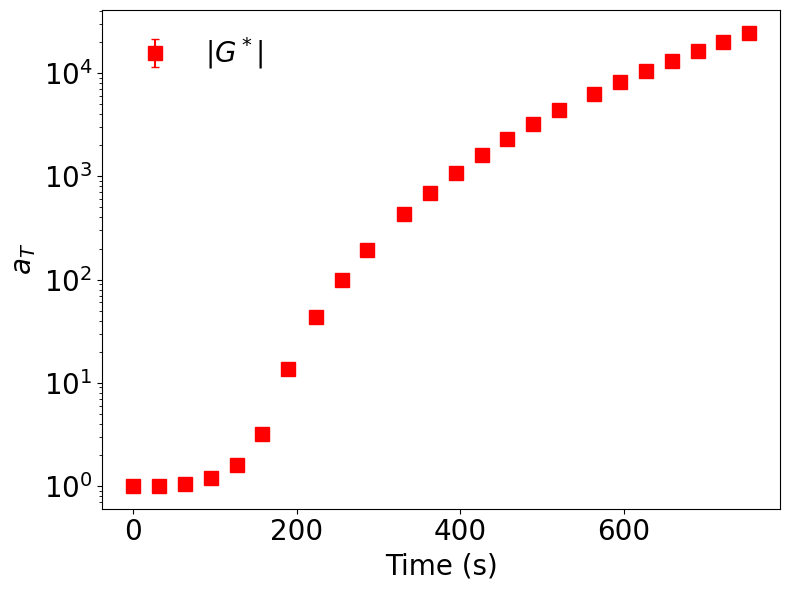

In [9]:
states = mastercurve_complex_modulus.states  # Assuming this is applicable for all

plt.figure(figsize=(8, 6))

plt.errorbar(states, a_complex, yerr=a_complex_uncertainties, fmt='rs', label="$|G^*|$", markersize=10, linestyle='none', capsize=3)

plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("$a_T$", fontsize=20)
plt.xscale('linear')  
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(fontsize=20, loc='best', frameon=False, ncol=2)

plt.tight_layout()
plt.show()
